# 1.Business Problem

3.With the growing consumption of avocados in the USA, a freelance company would like to do some analysis on the patterns of consumption in different cities and would like to come up with a prediction model for the price of avocados. For this to be implemented, build a prediction model using multilinear regression and provide your insights on it.
Snapshot of the dataset is given below: -


### 1.1 Business Objective

The objective is to analyze avocado sales data to predict the average price of avocados based on various features such as volume, bag size, type, year, and region. This insight can help stakeholders optimize pricing strategies, forecast future sales, and understand market trends.

### 1.2 Constraints

Data is limited to historical records from specific regions and years.

Seasonal and regional variations may affect model accuracy.

The model should balance accuracy with interpretability for business use.

Handling categorical variables (e.g., type and region) appropriately is essential.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df= pd.read_csv("Avacado_Price.csv")
df

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# 3.Data Pre-processing

### 3.1 Data Cleaning and Feature Engineering

In [4]:
df.isnull().sum()

AveragePrice    0
Total_Volume    0
tot_ava1        0
tot_ava2        0
tot_ava3        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [7]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['type', 'region'], drop_first=True)

In [10]:
#Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                18249 non-null  float64
 1   Total_Volume                18249 non-null  float64
 2   tot_ava1                    18249 non-null  float64
 3   tot_ava2                    18249 non-null  float64
 4   tot_ava3                    18249 non-null  float64
 5   Total_Bags                  18249 non-null  float64
 6   Small_Bags                  18249 non-null  float64
 7   Large_Bags                  18249 non-null  float64
 8   XLarge Bags                 18249 non-null  float64
 9   year                        18249 non-null  int64  
 10  type_organic                18249 non-null  uint8  
 11  region_Atlanta              18249 non-null  uint8  
 12  region_BaltimoreWashington  18249 non-null  uint8  
 13  region_Boise                182

In [12]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                18249 non-null  float64
 1   Total_Volume                18249 non-null  float64
 2   tot_ava1                    18249 non-null  float64
 3   tot_ava2                    18249 non-null  float64
 4   tot_ava3                    18249 non-null  float64
 5   Total_Bags                  18249 non-null  float64
 6   Small_Bags                  18249 non-null  float64
 7   Large_Bags                  18249 non-null  float64
 8   XLarge Bags                 18249 non-null  float64
 9   year                        18249 non-null  int64  
 10  type_organic                18249 non-null  uint8  
 11  region_Atlanta              18249 non-null  uint8  
 12  region_BaltimoreWashington  18249 non-null  uint8  
 13  region_Boise                182

In [13]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                18249 non-null  float64
 1   Total_Volume                18249 non-null  float64
 2   tot_ava1                    18249 non-null  float64
 3   tot_ava2                    18249 non-null  float64
 4   tot_ava3                    18249 non-null  float64
 5   Total_Bags                  18249 non-null  float64
 6   Small_Bags                  18249 non-null  float64
 7   Large_Bags                  18249 non-null  float64
 8   XLarge Bags                 18249 non-null  float64
 9   year                        18249 non-null  int64  
 10  type_organic                18249 non-null  uint8  
 11  region_Atlanta              18249 non-null  uint8  
 12  region_BaltimoreWashington  18249 non-null  uint8  
 13  region_Boise                182

### 3.2 Outlier Treatment

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

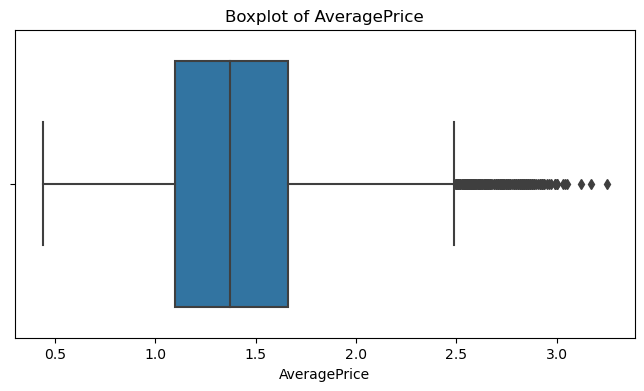

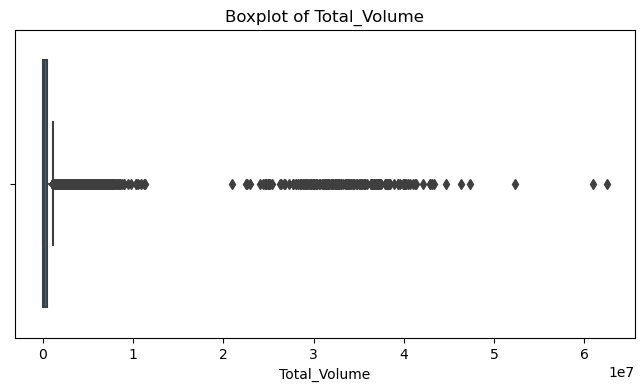

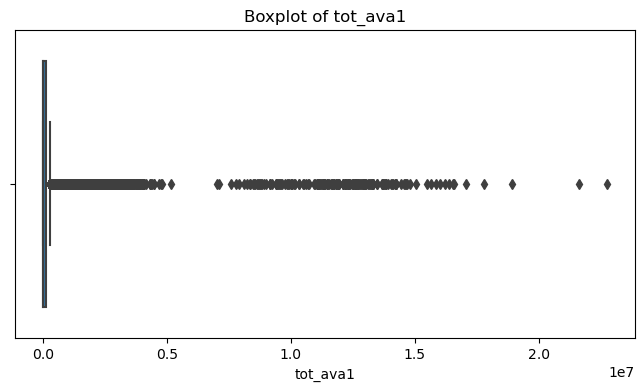

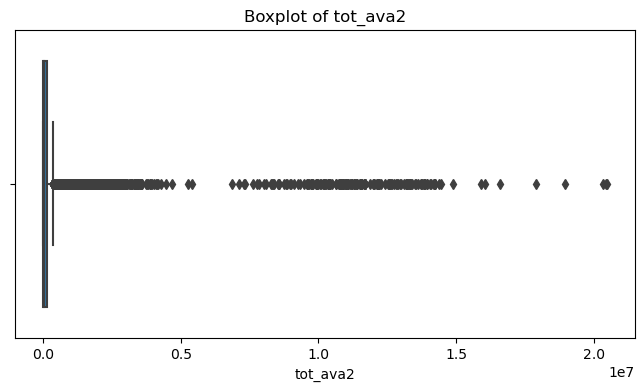

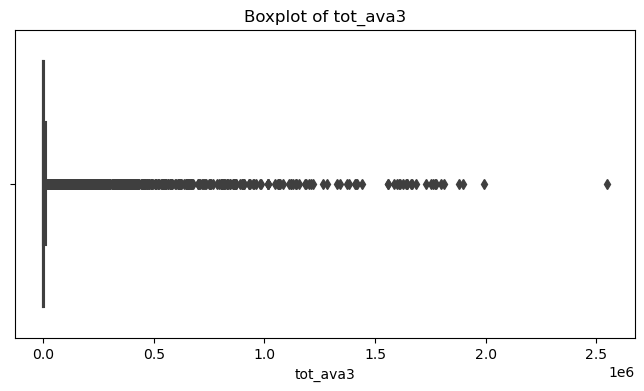

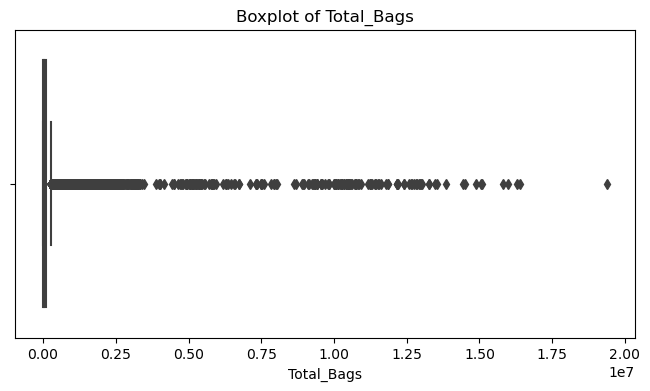

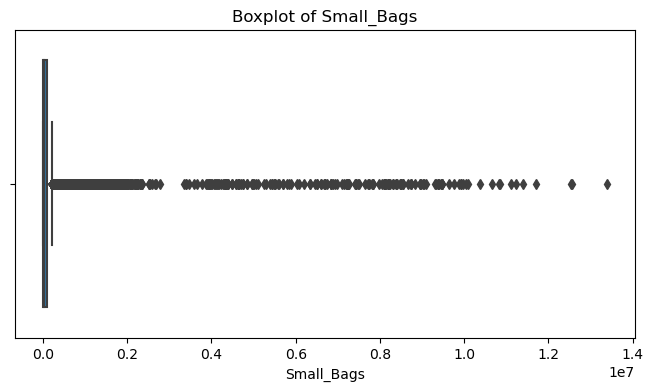

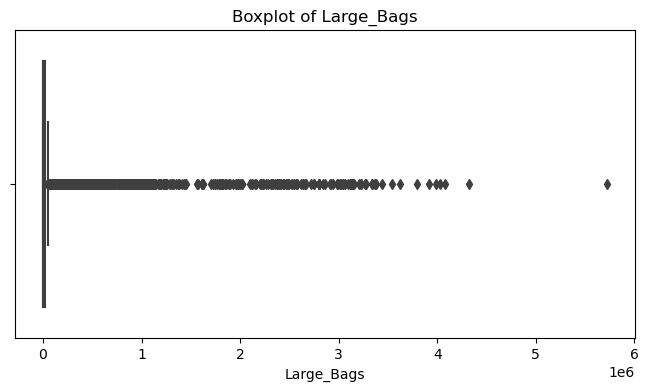

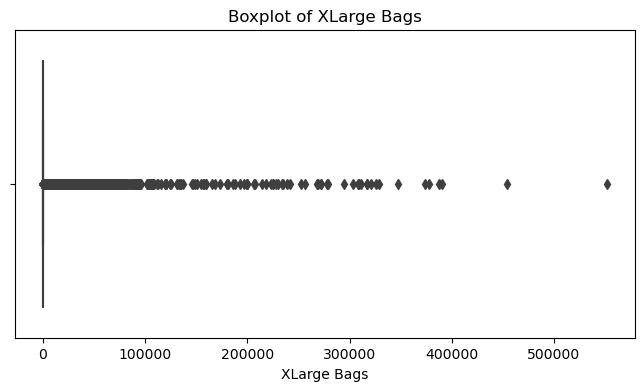

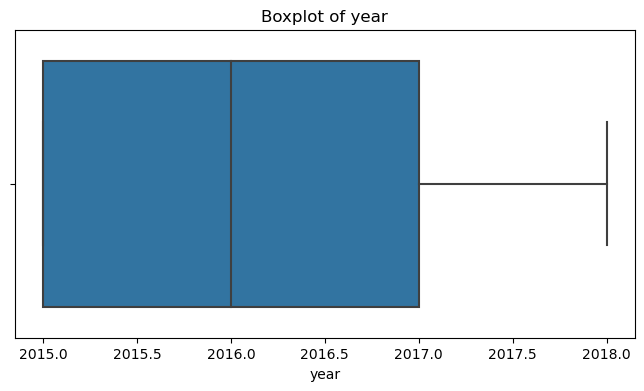

In [17]:
#Visualize outliers
numeric_cols = df.select_dtypes(include = ['float64','int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [19]:
#Remove outliers using IQR method
Q1 =df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_cols] < (Q1 - 1.5 *IQR)) | (df[numeric_cols] > (Q3  + 1.5 * IQR))).any(axis = 1)]


## 4.Exploratory Data Analysis (EDA)

### 4.1 Summary

In [21]:
# Summary statistics
df.describe()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
count,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.0,7342.000000,...,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.0,7342.0,7342.000000
mean,1.640079,16547.318534,2293.125357,6413.281595,43.014423,7797.238214,6583.948615,1213.289872,0.0,2016.104195,...,0.022337,0.003950,0.008445,0.020430,0.022065,0.037728,0.022473,0.0,0.0,0.020294
std,0.323452,21979.957579,4223.272889,11605.037051,119.034906,11440.129571,11129.045982,2177.753395,0.0,0.943817,...,0.147788,0.062728,0.091512,0.141477,0.146904,0.190551,0.148227,0.0,0.0,0.141014
min,0.560000,84.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2015.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,1.420000,4095.585000,102.430000,384.467500,0.000000,1405.037500,690.235000,0.000000,0.0,2015.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,1.620000,8701.460000,609.980000,2154.120000,0.000000,3840.340000,2226.610000,167.180000,0.0,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,1.860000,17888.962500,2047.402500,5554.802500,8.737500,8761.925000,7267.042500,1463.255000,0.0,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,2.490000,151754.580000,28363.690000,72159.950000,690.110000,81771.290000,72884.610000,11815.970000,0.0,2018.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


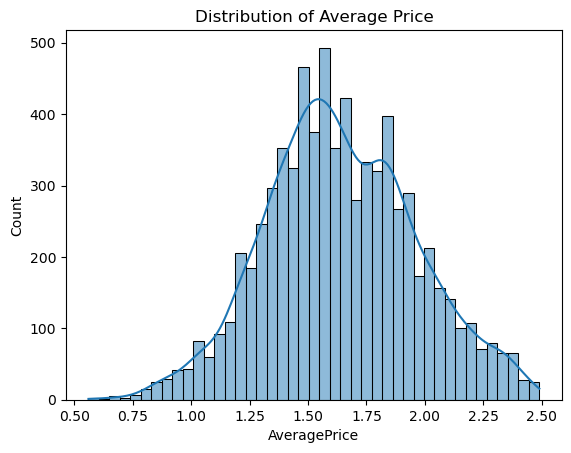

In [23]:
# Distribution of target variable
sns.histplot(df['AveragePrice'], kde=True)
plt.title('Distribution of Average Price')
plt.show()

### 4.2 Univariate Analysis

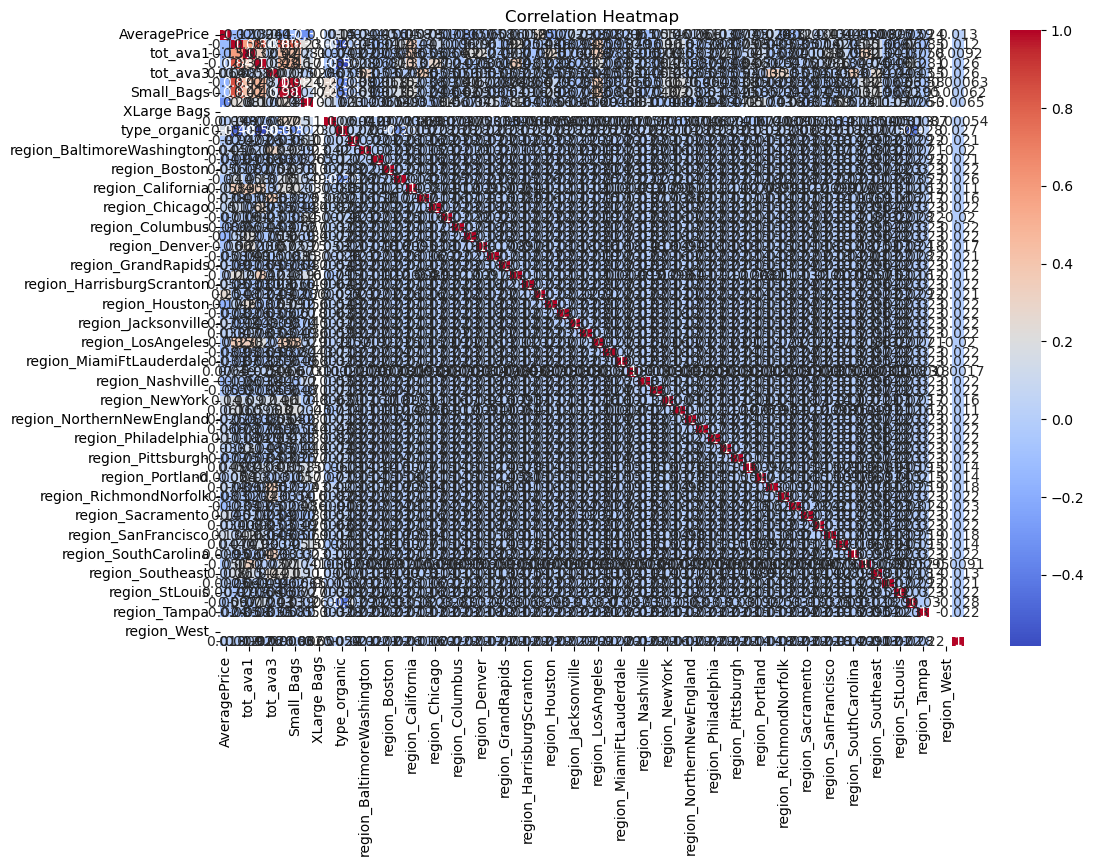

In [27]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 5.Model Building

### 5.1 Build the model on scaled data

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Feature scaling
scaler = StandardScaler()
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### 5.2 Multi Linear Regression: VIF, AvPlots, Influence Index Plots

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [32]:
# Check VIF
X_const = sm.add_constant(X_train)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_const, i) for i in range(X_const.shape[1])]
vif['Feature'] = ['const'] + list(X.columns)  # Ensure feature names match the length
print(vif)

# Model Summary
model = sm.OLS(y_train, X_const).fit()
print(model.summary())

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


             VIF                  Feature
0   1.004048e+00                    const
1   2.745207e+06             Total_Volume
2   1.005115e+05                 tot_ava1
3   7.507492e+05                 tot_ava2
4   8.391387e+01                 tot_ava3
..           ...                      ...
59  2.274086e+00          region_Syracuse
60  1.845565e+00             region_Tampa
61           NaN           region_TotalUS
62           NaN              region_West
63  1.817257e+00  region_WestTexNewMexico

[64 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     68.44
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:24:09   Log-Likelihood:                 5.4082

### 5.3 Evaluate Model (R-Squared and RMSE)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-Squared: {r2}")

RMSE: 0.2439394774500765
R-Squared: 0.417127731535223


### 5.4 Model Output Explanation

The model explains the relationship between avocado pricing and contributing features. Lower RMSE and higher R-squared values indicate better model performance.

5.5 Model Tuning

In [34]:
# Hyperparameter tuning using Grid Search
from sklearn.model_selection import GridSearchCV

params = {'fit_intercept': [True, False]}
grid = GridSearchCV(lr, params, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'fit_intercept': False}


## 6. Business Impact

The solution enables businesses to:

Predict future avocado prices accurately.

Optimize pricing strategies based on sales patterns.

Identify and analyze regional and temporal trends.

Improve supply chain management and inventory forecasting.